In [2]:
library(DescTools)
library(ggplot2)
library(readr)
library(dplyr)

In [3]:
test <- read.csv("ethbtc.csv", header=T)

In [4]:
test['class'] <- test['amount'] %/% 1
test$date2 <- as.POSIXct(test$date,origin="1970-01-01",tz="GMT")

In [5]:
head(test, n=3)

date,tid,price,amount,type,class,date2
1503082483,18776534,0.07048999,3.338015,0,3,2017-08-18 18:54:43
1503082483,18776533,0.07048998,1.890000,0,1,2017-08-18 18:54:43
1503082483,18776532,0.07047720,0.100000,0,0,2017-08-18 18:54:43


In [23]:
skalabilnost <- function(par) {
    ime <- paste(par, '.csv', sep='')
    data <- read.csv(ime, header=T)
    data['class'] <- data['amount'] %/% 1
    data$date2 <- as.POSIXct(data$date,origin="1970-01-01",tz="GMT")
    #print(head(data, n=3))
    #print(Desc(data$class, main = "Velikost transakcij", plotit = T, verbose=1))
    tmp <- split(data, cut(strptime(data$date2, format="%F %R"),"hour"))
    df <- data.frame(Date=as.Date(as.character()), sum=numeric(), max=numeric(), min=numeric(),
                     avg=numeric(), count=numeric(), stringsAsFactors=FALSE)
    for (ura in tmp) {
    vec <- c(ura$date2[[1]], sum(ura$amount), min(ura$amount), max(ura$amount),
                mean(ura$amount), length(ura$amount))
    df <- rbind(df, vec)
    }
    colnames(df)<- c("date","sum","min", "max", "mean", "count")
    df$date2 <- as.POSIXct(df$date,origin="1970-01-01",tz="GMT")
    #print(head(df))
    print(ggplot(data = df, mapping = aes(x = date2, y = count)) + 
     geom_col() + labs(x = "hour", y = "number of transactions"))
    print(ggplot(data = df, mapping = aes(x = date2, y = mean)) + 
     geom_col() + labs(x = "hour", y = "mean"))
}

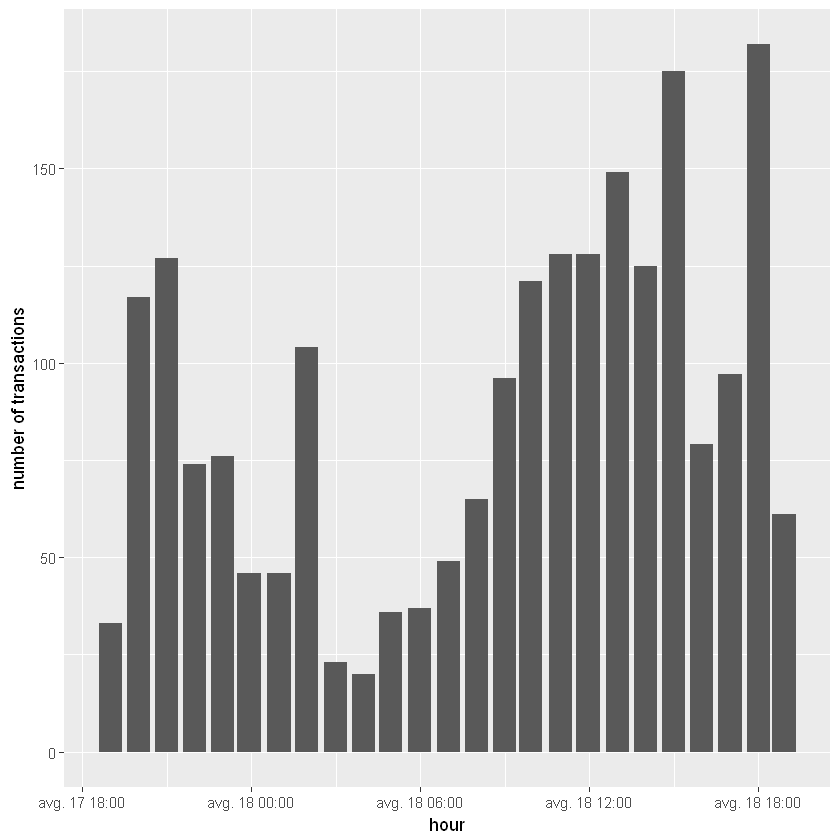

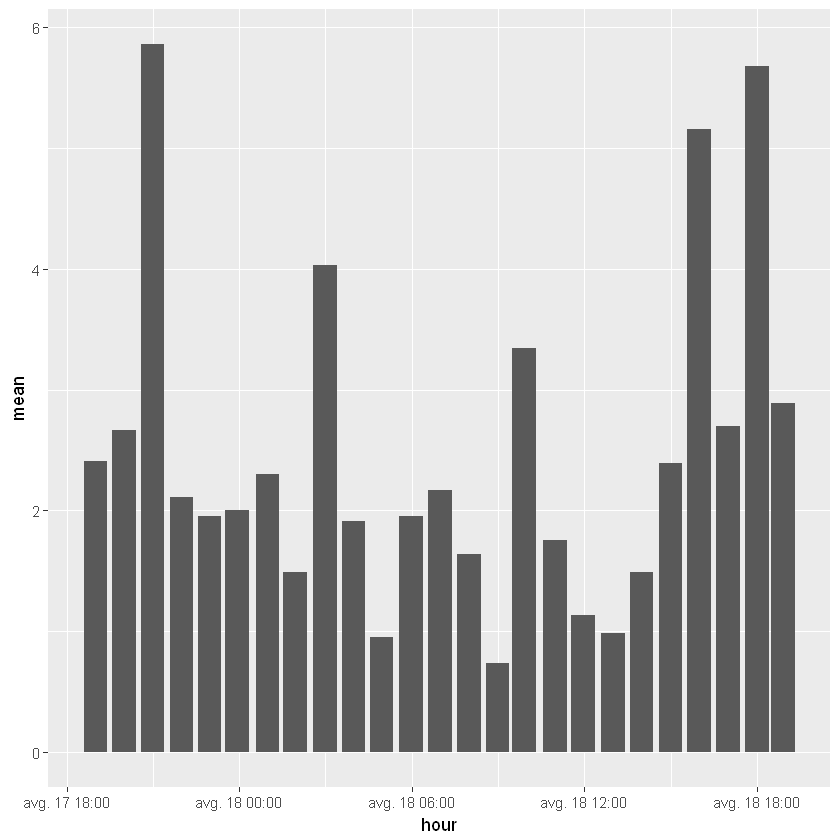

In [24]:
skalabilnost('ethbtc')

return multiple values from a function: https://stackoverflow.com/questions/8936099/returning-multiple-objects-in-an-r-function

date,sum,min,max,mean,count,date2
1502996392,79.38261,0.00003123,39.831315,2.4055336,33,2017-08-17 18:59:52
1502999992,311.41944,0.00000009,56.352166,2.6617046,117,2017-08-17 19:59:52
1503003567,744.51763,0.00000021,81.393804,5.8623435,127,2017-08-17 20:59:27
1503007195,155.92290,0.00000274,22.216791,2.1070662,74,2017-08-17 21:59:55
1503010684,148.36222,0.00011229,9.428894,1.9521345,76,2017-08-17 22:58:04
1503014115,92.16283,0.00000019,10.187210,2.0035399,46,2017-08-17 23:55:15
1503017936,105.78494,0.00263871,16.692268,2.2996726,46,2017-08-18 00:58:56
1503021417,155.20197,0.00000014,39.600000,1.4923266,104,2017-08-18 01:56:57
1503025178,92.69950,0.00000042,27.230000,4.0304130,23,2017-08-18 02:59:38
1503028709,38.27711,0.08233783,9.773400,1.9138554,20,2017-08-18 03:58:29


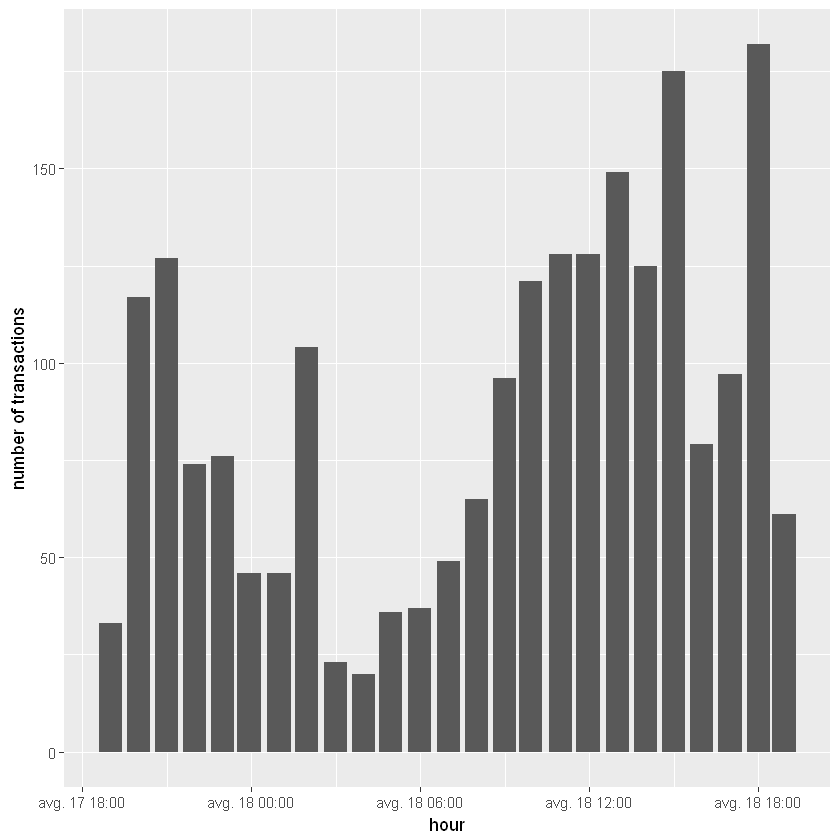

In [18]:
tmp <- split(test, cut(strptime(test$date2, format="%F %R"),"hour"))
df <- data.frame(Date=as.Date(as.character()), sum=numeric(), max=numeric(), min=numeric(),
                     avg=numeric(), count=numeric(), stringsAsFactors=FALSE)
for (ura in tmp) {
    vec <- c(ura$date2[[1]], sum(ura$amount), min(ura$amount), max(ura$amount),
                mean(ura$amount), length(ura$amount))
    df <- rbind(df, vec)
}
colnames(df)<- c("date","sum","min", "max", "mean", "count")
df$date2 <- as.POSIXct(df$date,origin="1970-01-01",tz="GMT")
df

ggplot(data = df, mapping = aes(x = date2, y = count)) + 
     geom_col() + labs(x = "hour", y = "number of transactions")